# Παραδείγματα δημιουργίας συνθετικών φασμάτων

Το αρχείο ``mspec.py`` που σας δώθηκε περιέχει δύο κλάσεις:

1. την ``SpectrumConfig``


2. την ``Spectrum``

Η πρώτη κλάση μας επιτρέπει να ορίσουμε κάποια χαρακτηριστικά με τα οποία θα αρχικοποιήσουμε το φάσμα το οποίο θέλουμε να κατασκευάσουμε. Αυτά τα χαρακτηριστικά είναι:

- Το εύρος των μηκών κύματος στο οποίο μας ενδιαφέρει το φάσμα. Σε αυτό το παράδειγμα θα χρησιμοποιήσουμε το συχνοτικό εύρος που αντιστοιχεί στο κόκκινο χρώμα ώστε να κατασκευάσουμε ένα φάσμα Raman.


- Ο αριθμός των επιμέρους συστατικών (συνιστωσών) από τις οποίες θα αποτελείται το φάσμα μας. Για παράδειγμα, μπορούμε να κατασκευάσουμε το φάσμα ενός κράματος ή ενός μίγματος αερίων που αποτελείται από δύο χημικά στοιχεία ή ενώσεις. Ο μέγιστος αριθμός συνιστωσών που υποστηρίζει η κλάση είναι 3. Αυτός είναι και ο προκαθορισμένος αριθμός συνιστωσών που θα χρησιμοποιηθεί αν επιλέξουμε να αφήσουμε κενό αυτό το πεδίο.


- Ο αριθμός των Γκαουσιανών κορυφών που εμπεριέχει κάθε συνιστώσα. Αν και αυτό δεν είναι απόλυτα σωστό, για λόγους απλότητας η κλάση θεωρεί ότι το φάσμα κάθε συνιστώσας αποτελείται από έναν αριθμό Γκαουσιανών κατανομών σε διάφορα μήκη κύματος, το οποίο καθορίζει πλήρως και μοναδικά τη συνιστώσα. Μπορούμε να επιλέξουμε τον αριθμό των Γκαουσιανών που θα έχει η κάθε συνιστώσα αλλά δεν μπορούμε να καθορίσουμε τα χαρακτηριστικά τους (ύψος, εύρος, θέση του μεγίστου) τα οποία επιλέγονται τυχαία. Αν δεν καθορίσουμε εμείς τον αριθμό των κορυφών που θέλουμε να έχει η κάθε συνιστώσα, τότε η κλάση θα δημιουργήσει φάσματα με προκαθορισμένο αριθμό κορυφών για κάθε συνιστώσα (τρεις για την πρώτη συνιστώσα, τεσσερις για τη δεύτερη και δύο για την τρίτη).


- Η συγκέντρωση των επιμέρους συστατικών (συνιστωσών) στο τελικό φάσμα του μίγματος/κράματος. Αν το πεδίο αυτό δεν συμπληρωθεί τότε η κλάση θα χρησιμοποιήσει τις προκαθορισμένες τιμές για τις συγκεντρώσεις της κάθε συνιστώσας (0.5 για την πρώτη, 0.3 για την δεύτερη και 0.2 για την τρίτη). Προσέξτε ότι το άθροισμα των επιμέρους συγκεντρώσεων ισούται με τη μονάδα.

Η δεύτερη κλάση κατασκευάζει το συνθετικό φάσμα του μίγματος βάσει των επιθυμητών χαρακτηριστικών που ορίσαμε προηγουμένως.
Επιπρόσθετα, η κλάση μας παρέχει με μερικές μεθόδους οπτικοποίησης των φασμάτων των επιμέρους συστατικών αλλά και του τελικού φάσματος, καθώς και με μία μέθοδο εξαγωγής των δεδομένων του τελικού φάσματος με τη μορφή ενός πίνακα numpy.

Παρακάτω θα παρουσίασουμε μερικά παραδείγματα για το πως μπορούμε να αρχικοποιήσουμε και να δημιουργήσουμε συνθετικά φάσματα.

In [1]:
# import classes and modules
import mspec as ms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(["default", "seaborn"])

In [2]:
## Uncomment the line below to get an overvies of the available 
## methods and attributes provided by the SpectrumConfig class

# help(ms.SpectrumConfig)

In [3]:
## Uncomment the line below to get an overvies of the available 
## methods and attributes provided by the Spectrum class

# help(ms.Spectrum)

In [4]:
x_range = np.linspace(650, 783, 1024) # range of wavelengths

## Δημιουργία φάσματος με μία συνιστώσα και 3 κορυφές

In [5]:
"""
HOW TO:

n_peaks = [peaks_for_component_A, peaks_for_component_B, peaks_for_component_C]
concentration = [concentration_for_component_A, concentration_for_component_B, concentration_for_component_C]
"""

# Initial configuration
config1 = ms.SpectrumConfig(wavelengths=x_range, n_components=1, n_peaks=[3], concentration=[1])

In [6]:
# Construct mixture spectrum
spec1 = ms.Spectrum(config1)

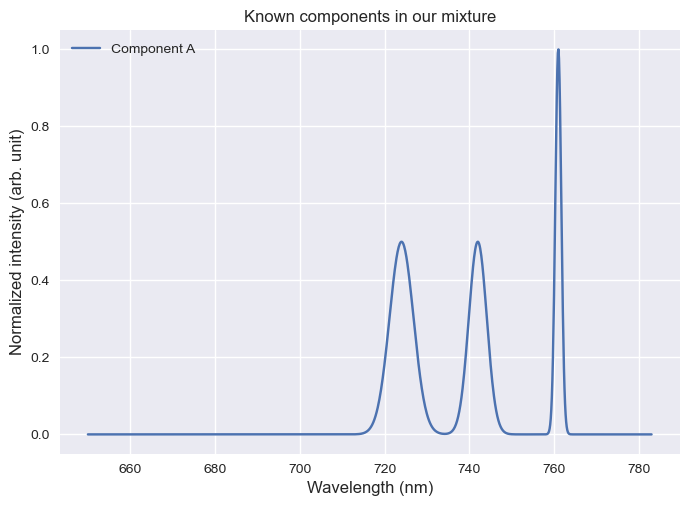

In [7]:
# Plot components spectra
spec1.plot_components()

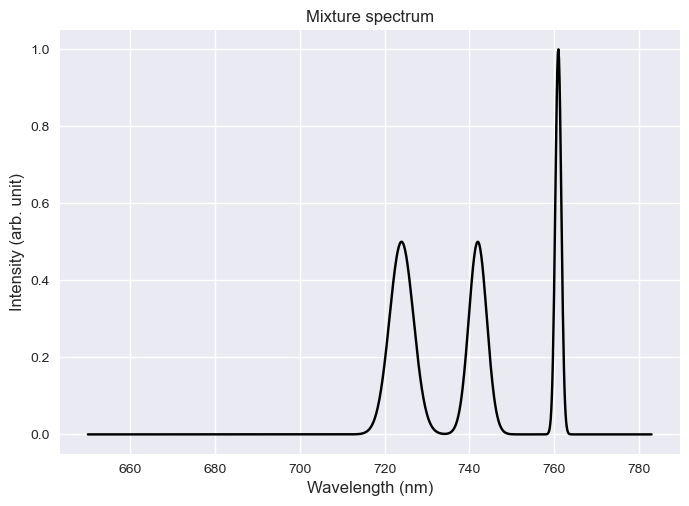

In [8]:
# Since we have only 1 component the mixture spectrum will be the same
spec1.plot_spectrum()

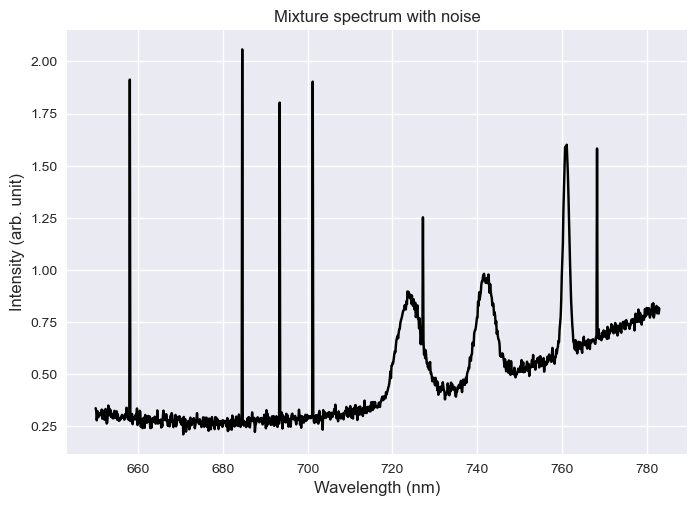

In [9]:
# Let's add some noise for a bit of realism
spec1.plot_spectrum(add_noise=True, add_baseline=True, add_spikes=True)

In [10]:
# Extract spectrum 
spec1_intensity = spec1.to_array(add_noise=True, add_baseline=True, add_spikes=True, verbose=True)
print(spec1_intensity)

Random noise added to spectrum: Done
Baseline added to spectrum: Done
Cosmic ray spikes added to spectrum: Done (6 spikes)
[0.33753173 0.32482161 0.27922578 ... 0.82083364 0.79132647 0.8152076 ]


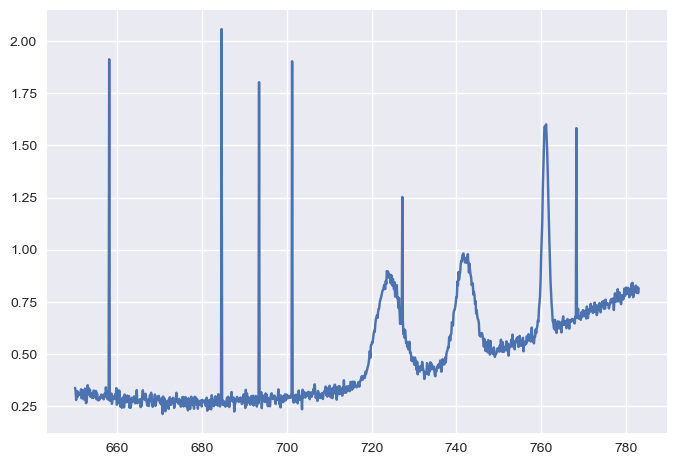

In [11]:
# Use the extracted data to replicate the figure above + many more
_ = plt.plot(x_range, spec1_intensity)

## Δημιουργία φάσματος με δύο συνιστώσες και 4, 2 κορυφές αντίστοιχα

In [12]:
"""
HOW TO:

n_peaks = [peaks_for_component_A, peaks_for_component_B, peaks_for_component_C]
concentration = [concentration_for_component_A, concentration_for_component_B, concentration_for_component_C]
"""

# Initial configuration
config2 = ms.SpectrumConfig(wavelengths=x_range, n_components=2, n_peaks=[4,2], concentration=[0.3,0.7])

In [13]:
# Construct the spectrum of the mixture
mix_spec = ms.Spectrum(config2)

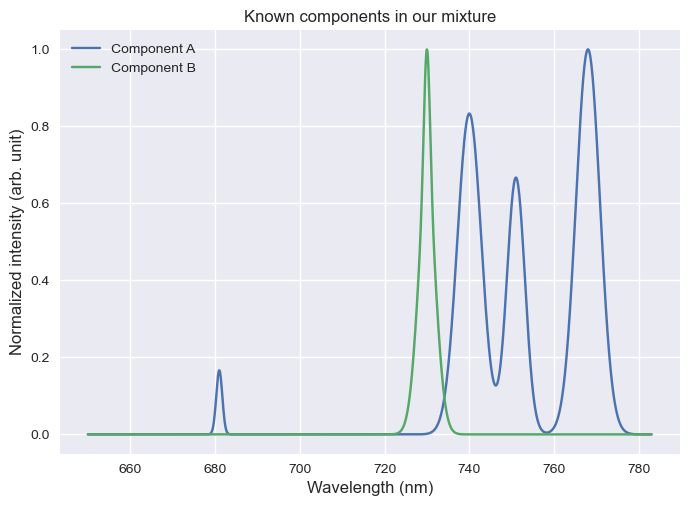

In [14]:
# Plot spectra of components
mix_spec.plot_components()

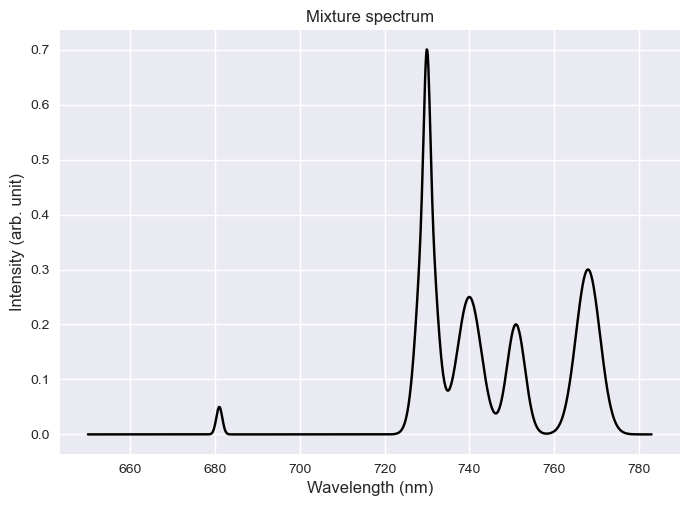

In [15]:
# Plot mixture spectrum
mix_spec.plot_spectrum()

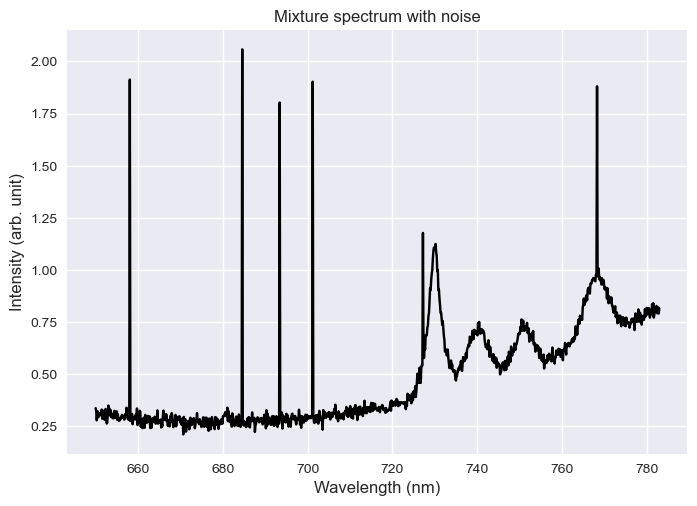

In [16]:
# Let's add some noise for a bit of realism
mix_spec.plot_spectrum(add_noise=True, add_baseline=True, add_spikes=True)

## Παράδειγμα αρχικοποίησης χαρακτηριστικών φάσματος με τις προκαθορισμένες τιμές

In [17]:
config3 = ms.SpectrumConfig(x_range)

In [18]:
default_spec = ms.Spectrum(config3)

--> default components added: 3


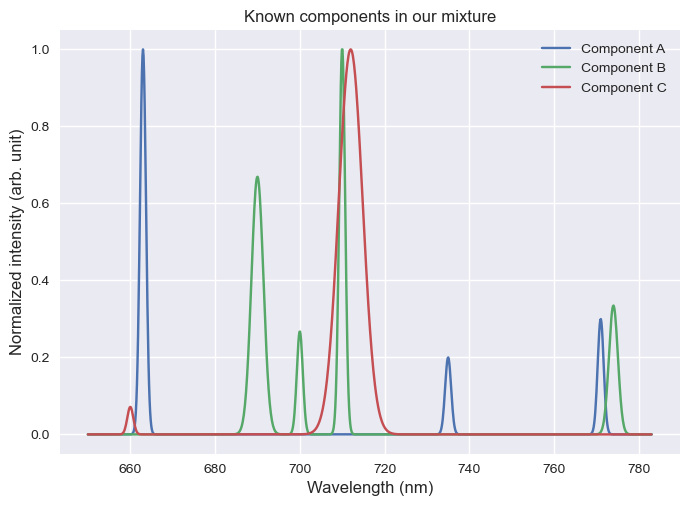

In [19]:
default_spec.plot_components()

--> default concentrations added: [0.5, 0.3, 0.2]


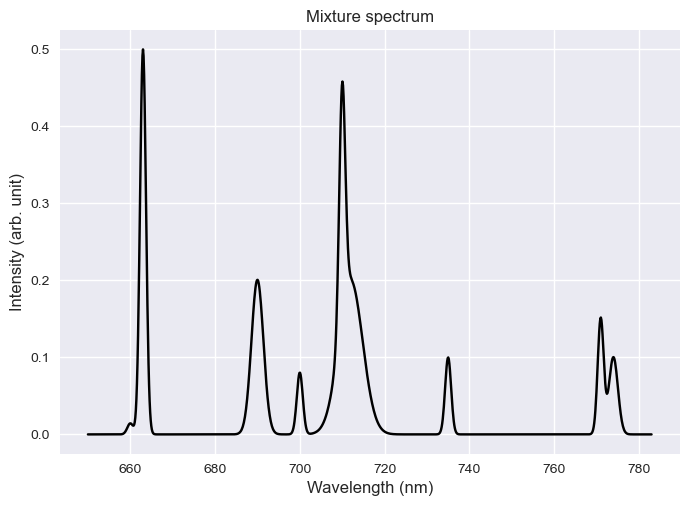

In [20]:
default_spec.plot_spectrum()

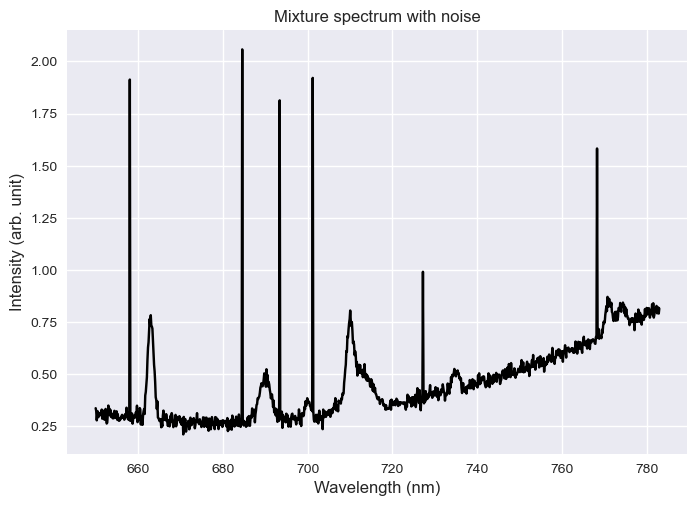

In [21]:
# Noisy default spectrum
default_spec.plot_spectrum(add_noise=True, add_baseline=True, add_spikes=True)

**Σημείωση**: Μπορεί να προσέξατε ότι ο θόρυβος που προσθέσαμε για να κάνουμε πιο ρεαλιστικά τα συνθετικά φάσματα είναι πάντα ο ίδιος. Αυτό συμβαίνει γιατί, για λόγους επαναληψιμότητας των αποτελεσμάτων, χρησιμοποιούμε κάθε φορά το ίδιο seed για τη γεννήτρια των τυχαίων αριθμών. Μπορείτε να αλλάζετε αυτή την παράμετρο όπως φαίνεται στο παρακάτω παράδειγμα.

## Δημιουργία φάσματος με διαφορετικό θόρυβο

In [22]:
# make default spectrum
config = ms.SpectrumConfig(x_range)
spec = ms.Spectrum(config) 

--> default components added: 3


--> default concentrations added: [0.5, 0.3, 0.2]


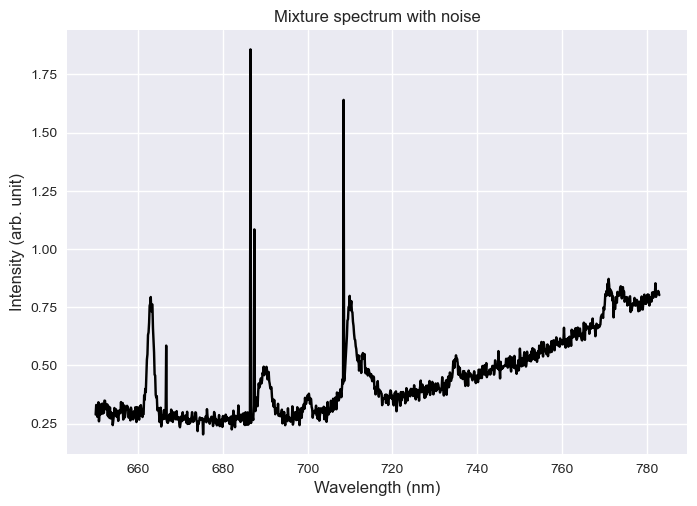

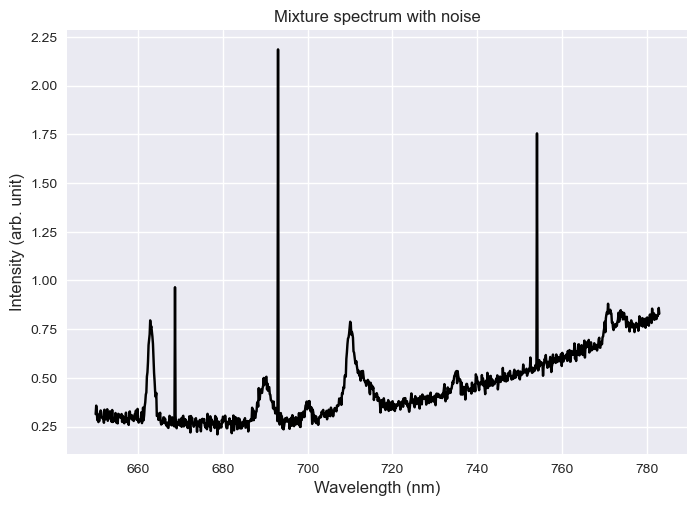

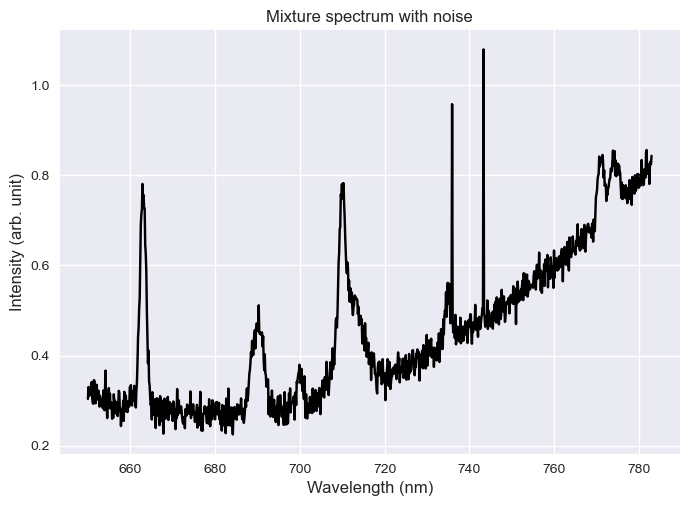

In [23]:
# seeds = [10, 10, 10] # Run these seeds instead of the seeds below to check the output of a constant seed
seeds = [123, 85, 32]
intensities = []

for seed in seeds:
    intensities.append(spec.to_array(add_noise=True, add_baseline=True, add_spikes=True, seed=seed))
    spec.plot_spectrum(add_noise=True, add_baseline=True, add_spikes=True, seed=seed)

Εξάγωντας τα φάσματα που προέκυψαν από τις τρεις αυτές επαναλήψεις και κάνοντας μία υπέρθεσή τους στο ίδιο διάγραμμα φαίνεται πως μεταβλήθηκαν τόσο οι αιχμές από τις κοσμίκες ακτίνες όσο και ο τυχαίος θόρυβος από τα όργανα μέτρησης.

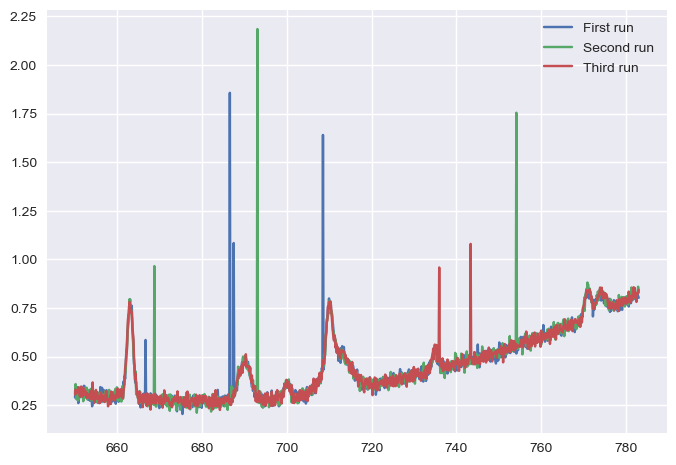

In [24]:
labels = ["First run", "Second run", "Third run"]
for i in range(len(intensities)):
    plt.plot(x_range, intensities[i], label=labels[i])
    plt.legend()